### Kalman Filter
some exercises from: https://lectures.quantecon.org/py/kalman.html

### Exercise 1

$x_{t+1} = Fx_{t} + w_{t+1}, \; w_{t+1} \sim N(O,Q)$

$y_{t} = \theta + v_t, \; v_t \sim N(0,1)$

$F=1, $
$Q=0, $

$x_t=\theta, \; \forall t$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from kalman_filter import kalman_filter

H=np.array([[1]])
F = np.array([[1]])
Q=np.array([[0]])
R=np.array([[1]])
x0 = np.array([[8]])
P0 = np.array([[1]])
theta = 10
T=600

y = theta + np.random.normal(size=T)

f = kalman_filter(H, F, Q, R, x0, P0)
xf, Pf = f.run(y)

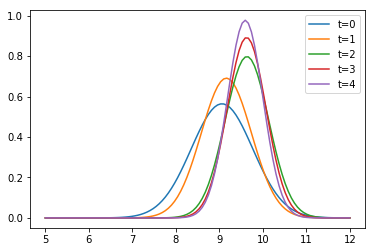

In [2]:
# Plots
Pf = np.reshape(Pf,(T,))

x = np.linspace(5, 12, 100)
plt.plot(x,mlab.normpdf(x, xf[0], np.sqrt(Pf[0])), label='t=0')
plt.plot(x,mlab.normpdf(x, xf[1], np.sqrt(Pf[1])), label='t=1')
plt.plot(x,mlab.normpdf(x, xf[2], np.sqrt(Pf[2])), label='t=2')
plt.plot(x,mlab.normpdf(x, xf[3], np.sqrt(Pf[3])), label='t=3')
plt.plot(x,mlab.normpdf(x, xf[4], np.sqrt(Pf[4])), label='t=4')

plt.legend()
plt.show()

### Exercise 2

For small $\epsilon >0$ plot the $z_t$ where,

$z_t := 1 - \int_{\theta+\epsilon}^{\theta-\epsilon} p_t(x) dx$

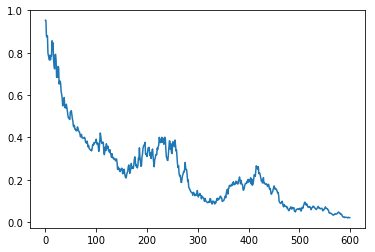

In [3]:
from scipy.stats import norm
from scipy.integrate import quad


epsilon = 0.1
z = np.empty_like(y)

for i in range(np.size(y)):
    
    integral = norm.cdf(theta+epsilon, xf[i], np.sqrt(Pf[i])) - norm.cdf(theta-epsilon, xf[i], np.sqrt(Pf[i]))
    
    z[i] = 1 - integral
    
plt.plot(z)
plt.show()

### Exercise 3

In [4]:
# The state space
I = np.identity(2)
F = np.array([[0.5, 0.4], [0.6, 0.3]])
H = I
R = I * 0.5 
Q = I * 0.3

# number of observations
T = 50

x0 = np.array([[8],[8]])
P0 = np.array([[0.9, 0.3], [0.3, 0.9]])
x0_true = np.array([[0],[0]])

mu = np.array([0, 0])

# Simulate x_true
x_true = np.empty((T,2))
x_true[0,:] = x0_true.T

for i in range(1,T):
    x_true[i,:] = np.dot(F,x_true[i-1,:]) + np.random.multivariate_normal(mu, Q)
    
# Simulate y
y = np.empty((T,2))

for i in range(T):
    y[i,:] = x_true[i,:] + np.random.multivariate_normal(mu, R)

# Conditional Expectations
cond_exp = np.empty((T,2))
cond_exp[0,:] = x0_true.T

for i in range(1,T):
    cond_exp[i,:] = np.dot(F,x_true[i-1,:])

cond_exp_error = [np.linalg.norm(x_true[row] - cond_exp[row]) for row in range(T)]

# Kalman Filter
f = kalman_filter(H, F, Q, R, x0, P0)
xf, Pf = f.run(y)
kf_error = [np.linalg.norm(x_true[row] - xf[row]) for row in range(T)]

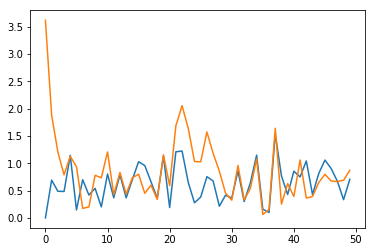

In [5]:
plt.plot(cond_exp_error)
plt.plot(kf_error)
plt.show()